# Importing all the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading train and test data through pandas library( read_csv function)

In [2]:
data=pd.read_csv('C:/Users\Khushi Patidar/Desktop/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('C:/Users\Khushi Patidar/Desktop/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing 

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

# Cheacking null values in both train and test data 

In [6]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [8]:
data.shape

(891, 12)

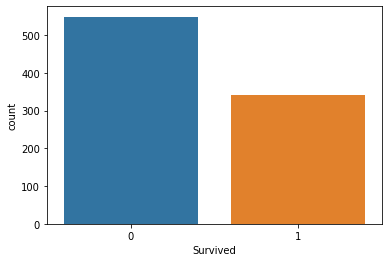

In [9]:
sns.countplot(data['Survived'])

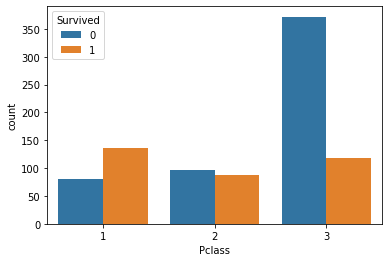

In [10]:
sns.countplot(data=data,x='Pclass',hue='Survived')  #  1= 1st = Upper , 2= 2nd = Middle , 3= 3rd = Lower

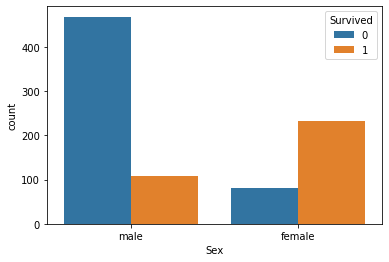

In [11]:
sns.countplot(data=data,x='Sex',hue='Survived')

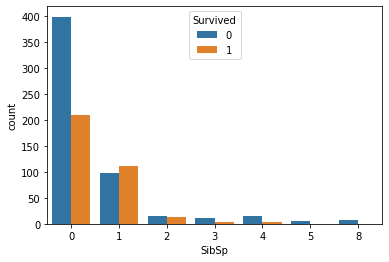

In [12]:
sns.countplot(data=data,x='SibSp',hue='Survived')    # siblings / spouses aboard the Titanic
#                                                      Sibling = brother, sister, stepbrother, stepsister
#                                                      Spouse = husband, wife 

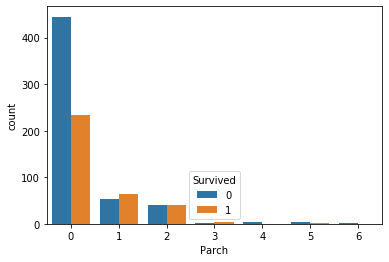

In [13]:
sns.countplot(data=data,x='Parch',hue='Survived')   # parents / children aboard the Titanic

#                                                      Parent = mother, father
#                                                      Child = daughter, son, stepdaughter, stepson
#                                                      Some children travelled only with a nanny, therefore parch=0 for them.

In [14]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

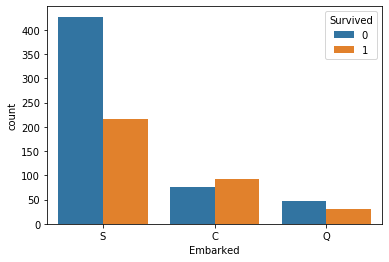

In [15]:
sns.countplot(data=data,x='Embarked',hue='Survived')  # C = Cherbourg , Q = Queenstown , S = Southampton

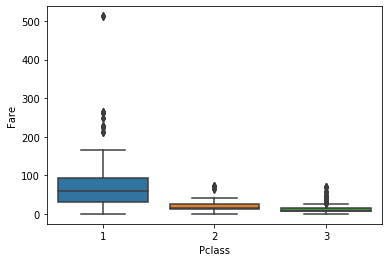

In [16]:
sns.boxplot(data=data,y='Fare',x='Pclass')  # Shows that 1st/upper class has higher fare tham other two class

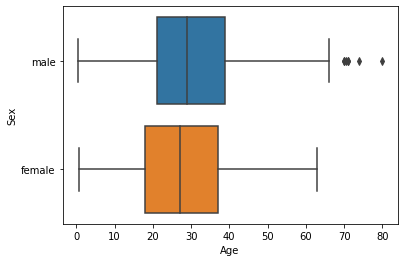

In [17]:
sns.boxplot(data=data,x='Age',y='Sex')

## From the above plot we can clearly see that median of both female and male is different

In [18]:
data[data.Age.isnull()].Sex.value_counts()  

male      124
female     53
Name: Sex, dtype: int64

In [19]:
test[test.Age.isnull()].Sex.value_counts()

male      61
female    25
Name: Sex, dtype: int64

In [20]:
median_female=data[data['Sex']=='female'].Age.median() 
median_female

27.0

In [21]:
median_male=data[data['Sex']=='male'].Age.median()
median_male

29.0

## Filling missing values of Age 

In [22]:
data[data['Sex']=='male'].Age=data['Age'].fillna(29,inplace=True)

C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
data[data['Sex']=='Female'].Age=data['Age'].fillna(27,inplace=True)

In [24]:
test[test['Sex']=='male'].Age=test['Age'].fillna(29,inplace=True)

In [25]:
test[test['Sex']=='male'].Age=test['Age'].fillna(27,inplace=True)

In [26]:
data.Embarked.mode()

0    S
dtype: object

In [27]:
data.Embarked.fillna('S',inplace=True)

## Their are some columns which are not contributing(does not have correlation) towards survival columns

In [28]:
data.drop(['PassengerId','Cabin','Ticket','Name','Fare'],axis=1,inplace=True)

In [29]:
ID=test['PassengerId']
ID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [30]:
Id=pd.DataFrame(ID,columns=['PassengerId'])
Id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [31]:
test.drop(['PassengerId','Cabin','Ticket','Name','Fare'],axis=1,inplace=True)

In [32]:
test.isnull().sum().sort_values(ascending=False)

Embarked    0
Parch       0
SibSp       0
Age         0
Sex         0
Pclass      0
dtype: int64

In [33]:
data.isnull().sum().sort_values(ascending=False)

Embarked    0
Parch       0
SibSp       0
Age         0
Sex         0
Pclass      0
Survived    0
dtype: int64

# Creating dummies of catogerical columns with one-hot encoding

In [34]:
data=pd.get_dummies(data,columns=['Sex','Embarked'])

In [35]:
test=pd.get_dummies(test,columns=['Sex','Embarked'])

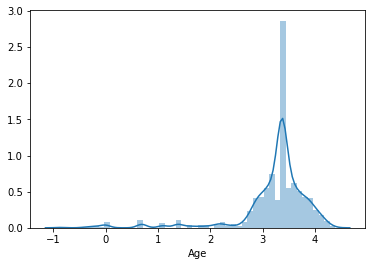

In [36]:
data['Age']=np.log(data['Age'])
sns.distplot(data['Age'])

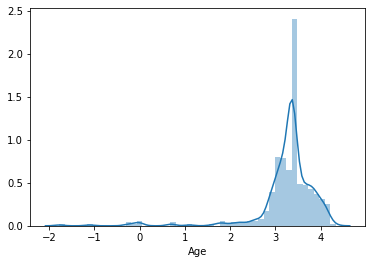

In [37]:
test['Age']=np.log(test['Age'])
sns.distplot(test['Age'])

In [38]:
test.head(3)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,3.540959,0,0,0,1,0,1,0
1,3,3.850148,1,0,1,0,0,0,1
2,2,4.127134,0,0,0,1,0,1,0


In [39]:
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,3.091042,1,0,0,1,0,0,1
1,1,1,3.637586,1,0,1,0,1,0,0
2,1,3,3.258097,0,0,1,0,0,0,1


# Model Building

## Separating feature and target columns

In [40]:
X_train = data.drop('Survived', 1) 
y_train = data['Survived']

## 1st Model ( logistic Regression)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_train,y_train,test_size=0.2)

In [43]:
lreg=LogisticRegression()
lreg.fit(X_train,y_train)

C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction through our model (testing)

## Accuracy of our model on test data

In [44]:
y_pred=lreg.predict(X_test)
lreg.score(X_test,y_test)

0.8156424581005587

# 2nd Model (Decision Tres)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=10)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Accuracy of our model on test data

In [47]:
y_pred2= classifier.predict(X_test)  
classifier.score(X_test,y_test)

0.776536312849162

In [48]:
test_copy=test.copy()

# Submission

In [49]:
survived=pd.DataFrame(lreg.predict(test_copy),columns=['Survived'])   # predicting through linear regression model 
survived

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [50]:
submission3=pd.concat([Id,survived],axis=1)
submission3.set_index('PassengerId',inplace=True)
submission3.head(5)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [51]:
submission3.to_csv('C:/Users\Khushi Patidar/Desktop/titanic/submission.csv',index=True)